# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Siddik Ayyappa <br>
Roll Number: 2020101089

### Dataset

Use the code below to load the Dataset


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [10]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

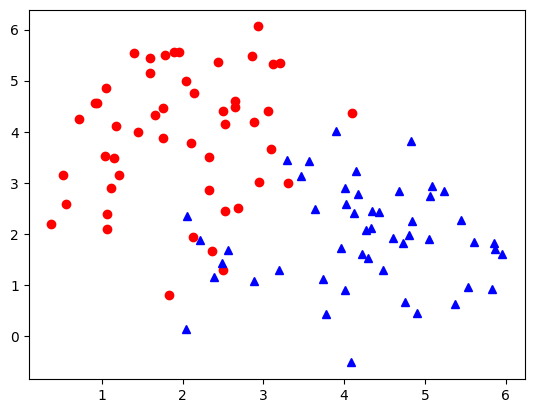

In [12]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.show()

Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

In [13]:
class logistic_regression():
    def __init__(self, learning_rate, threshold=0.5):
        self.learning_rate = learning_rate
        self.threshold = threshold
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def fit(self, x, y, epochs):
        self.parameters, gradient = np.zeros(x[0].shape), np.zeros(x[0].shape)
        self.bias = 0
        bias_gradient = 0
        for _ in range(epochs):
            loss = 0
            diff = 0
            for i in range(len(x)):
                y_hat = self.sigmoid(np.dot(self.parameters, x[i]) + self.bias)
                diff = y_hat - y[i]
                gradient += self.learning_rate*(diff)*x[i]
                bias_gradient += self.learning_rate*(diff)
            gradient /= len(y)
            bias_gradient /= len(y)
            self.parameters -= self.learning_rate*(gradient)
            self.bias -= self.learning_rate*(bias_gradient)
            pass
    def process(self, z):
        if(z > self.threshold):
            return 1
        else:
            return 0
    def predict(self, x_test):
        y_pred = []
        for i in range(len(x_test)):
            y_pred += [self.process(self.sigmoid(np.dot(self.parameters, x_test[i]) + self.bias))]
        y_pred = np.array(y_pred)
        return y_pred
    def eval(self, y, y_hat):
        score = 0
        for i in range(len(y)):
            if(y[i] == y_hat[i]):
                score += 1
        return score/len(y)*100

In [14]:
x = logistic_regression(learning_rate=0.01)
start = timeit.default_timer()
x.fit(x_train, y_train, 10000)
end = timeit.default_timer()
print("Training Done")
print("Time: ", end-start, "s")
y_pred = x.predict(x_test)

Training Done
Time:  4.6634470600038185 s


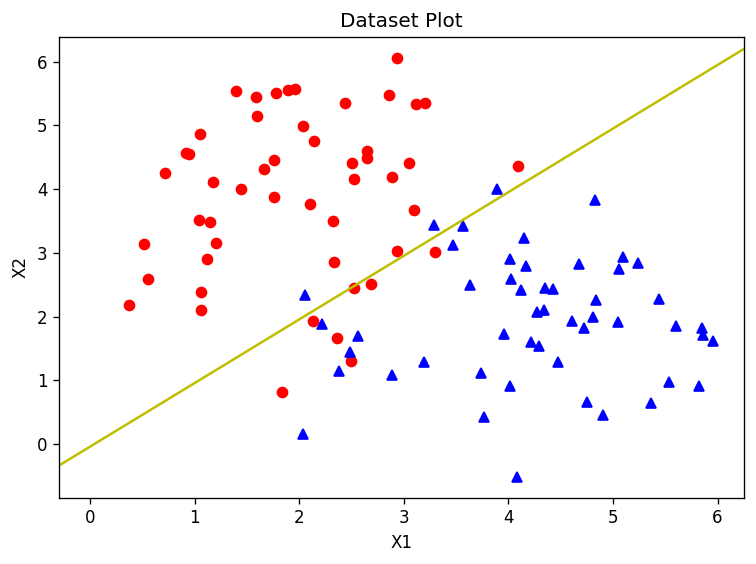

In [15]:
fig, ax = plt.subplots(dpi=120)
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
theta_1 = x.parameters[0]
theta_2 = x.parameters[1]
theta_3 = x.bias
x_values = [0, -theta_3/theta_1]
y_values = [-theta_3/theta_2, 0]
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dataset Plot")
plt.axline((x_values[0], y_values[0]), (x_values[1], y_values[1]), color='y')
plt.tight_layout()
plt.savefig("LogisticRegression_result.png")
plt.show()

Accuracy of the Classification on the test set: 85.0 %


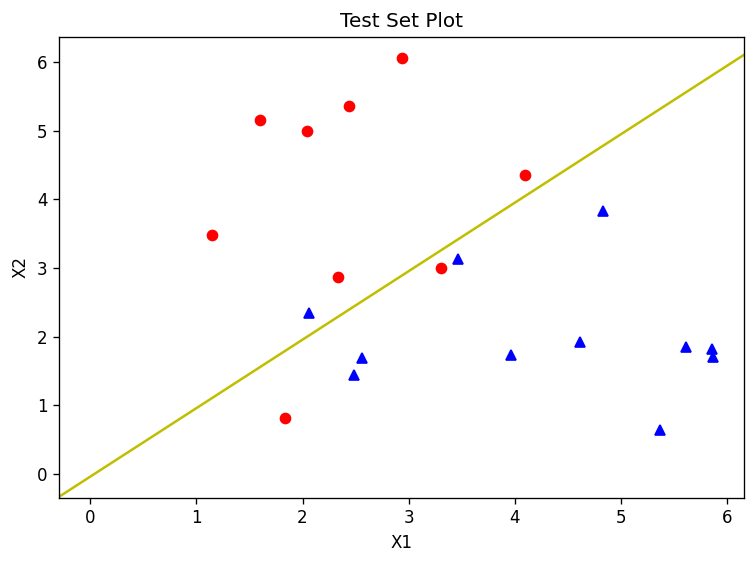

In [16]:
acc = x.eval(y_pred, y_test)
print("Accuracy of the Classification on the test set:", acc,"%" )
fig, ax = plt.subplots(dpi=120)
plt.plot(x_test[:,0][y_test==0],x_test[:,1][y_test==0],'o',color='red')
plt.plot(x_test[:,0][y_test==1],x_test[:,1][y_test==1],'^',color='blue')
theta_1 = x.parameters[0]
theta_2 = x.parameters[1]
theta_3 = x.bias
x_values = [0, -theta_3/theta_1]
y_values = [-theta_3/theta_2, 0]
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Test Set Plot")
plt.axline((x_values[0], y_values[0]), (x_values[1], y_values[1]), color='y')
plt.tight_layout()
plt.show()


### Questions

1) Explain the approach of Logistic Regression.
   <br><br>
   Logistic regression is a technique used to create a decision boundary for classification problems. Logistic regression provides the probability of a sample belonging to a class. The class with the highest probability is assigned to the sample. What Logistic regression does, is fit a logistic function, i.e.
   <br><br>
   $\sigma(x) = \frac{1}{1+e^{-x}}$
   <br><br>
   to the space of (X,y) (the sample space, with an extra point added, which will be the class.). This helps us to create a decision boundary in the space (X), which is a hyperplane passing through the point where $\sigma(x) = 0.5$. 
   <br><br>
2) What is the loss function used?
   <br><br>
   The loss function used is the binary crossentropy or rather, the log loss.
   <br><br>
   $J(\hat{y}, y) = -\frac{1}{N}\sum(y_i.\log(\hat{y_i}) + (1-y_i).\log(1-\hat{y_i}))$
   <br><br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.
   <br><br>
   <p>We can Indeed use MSE as the loss function. However the result will not be as good as the binary crossentropy loss function. 
   Consider, we are not trying to solve a classification problem. Take it as if we were solving a linear regression problem, it is quite same as if we are doing classification, the range can be adjusted to [0,1], since we use sigmoid function. If the output of the sigmoid function is greater than 0.5, we assign 1 else, 0. This clearly tells us we can indeed use MSE.</p>
   
   However, consider the case, of a complete misclassification $\hat{y} = 1, y = 0$. The binary crossentropy tends to $\infty$ <br>($\because 0*\log(1) + 1*\log(0) \rightarrow \infty$)<br> However the MSE loss function equals 1. This suggests that Binary crossentropy stringly penalises misclassification, hence, is more suited to the classification task.
